In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway, kruskal, shapiro, skew

In [29]:
# DATASET INFO
df = pd.read_csv('../data/alpha_thalassemia.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     859 non-null    int64  
 1   sex     859 non-null    int64  
 2   HB      859 non-null    float64
 3   HCT     859 non-null    float64
 4   MCV     859 non-null    float64
 5   MCH     859 non-null    float64
 6   MCHC    859 non-null    float64
 7   RDW     859 non-null    float64
 8   RBC     859 non-null    float64
 9   target  859 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 67.2 KB


In [30]:
# CHECK NaN
print(df.isnull().sum())

age       0
sex       0
HB        0
HCT       0
MCV       0
MCH       0
MCHC      0
RDW       0
RBC       0
target    0
dtype: int64


In [31]:
# PLOT SETTINGS
df['target'] = df['target'].map({
	1: "normal",
	2: "silent",
	3: "trait",
	4: "HbH"
})

df['sex'] = df['sex'].map({
	1: "female",
	2: "male"
})

class_name = ['normal', 'silent', 'trait', 'HbH']
palette = sns.color_palette("Set2", n_colors = len(class_name))


/var/folders/1n/hqfxw2512337xx0r3wv599br0000gn/T/ipykernel_95218/294204435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'target', data = df, palette = palette, order = class_name)


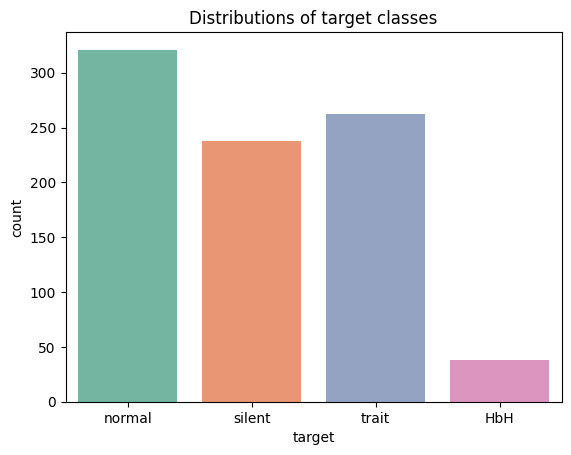

In [32]:
# IDA - Target
sns.countplot(x = 'target', data = df, palette = palette, order = class_name)
plt.title('Distributions of target classes')
plt.show()

/var/folders/1n/hqfxw2512337xx0r3wv599br0000gn/T/ipykernel_95218/460443173.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


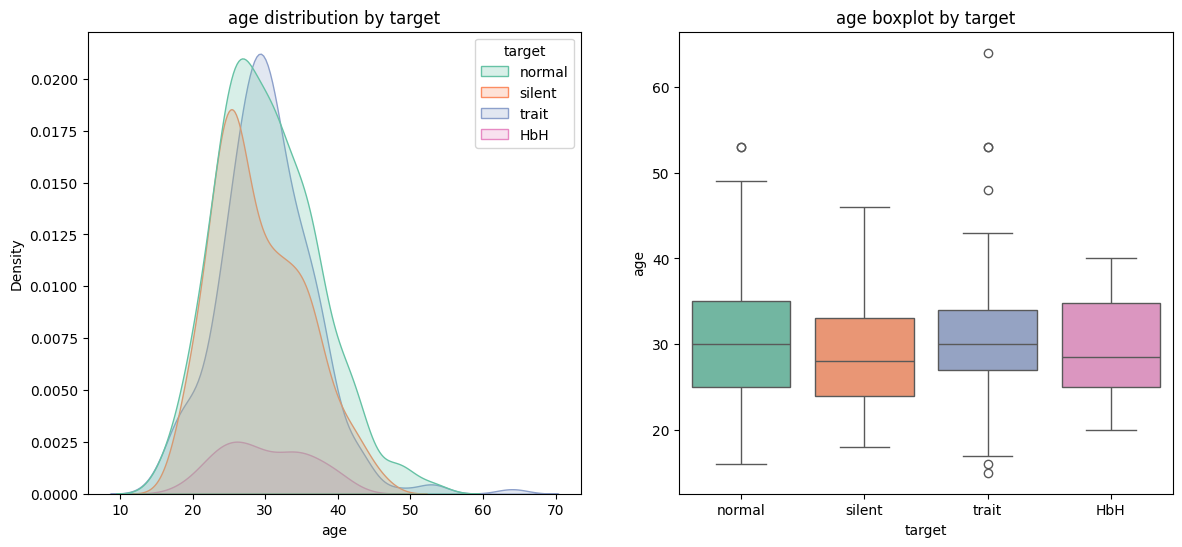

/var/folders/1n/hqfxw2512337xx0r3wv599br0000gn/T/ipykernel_95218/460443173.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


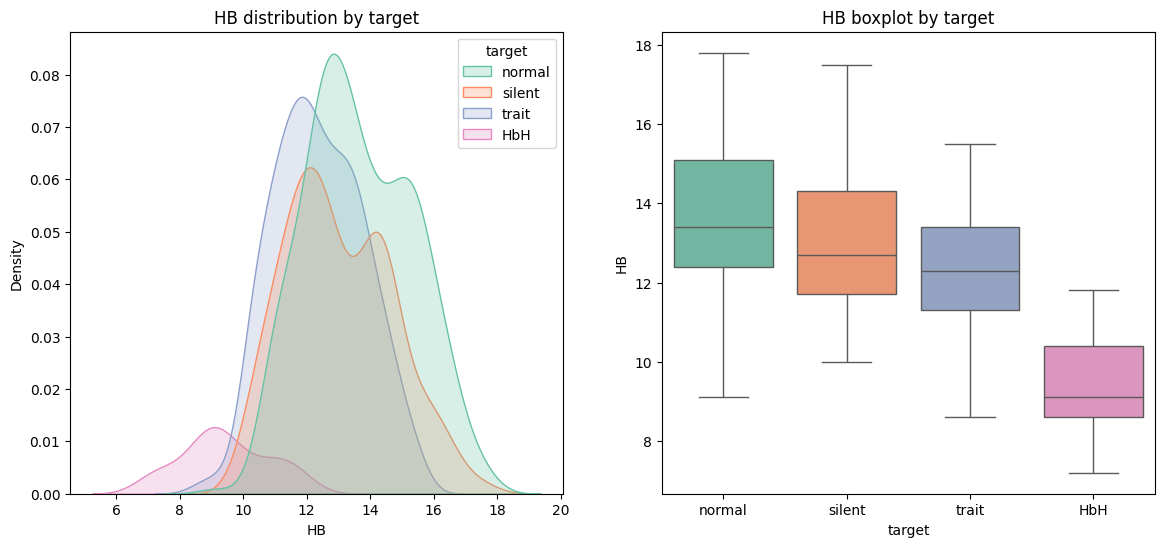

/var/folders/1n/hqfxw2512337xx0r3wv599br0000gn/T/ipykernel_95218/460443173.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


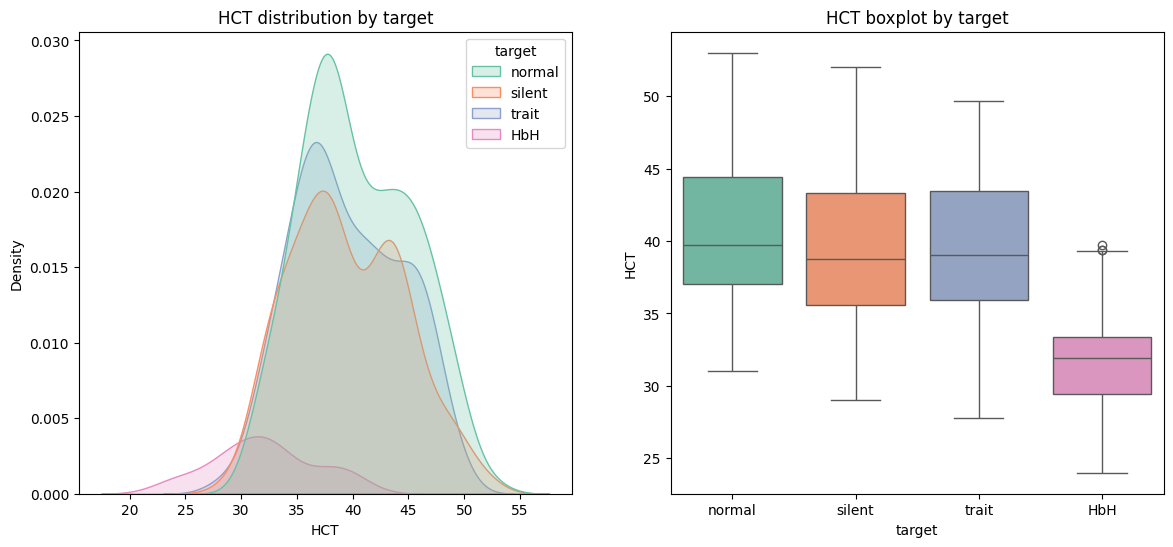

/var/folders/1n/hqfxw2512337xx0r3wv599br0000gn/T/ipykernel_95218/460443173.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


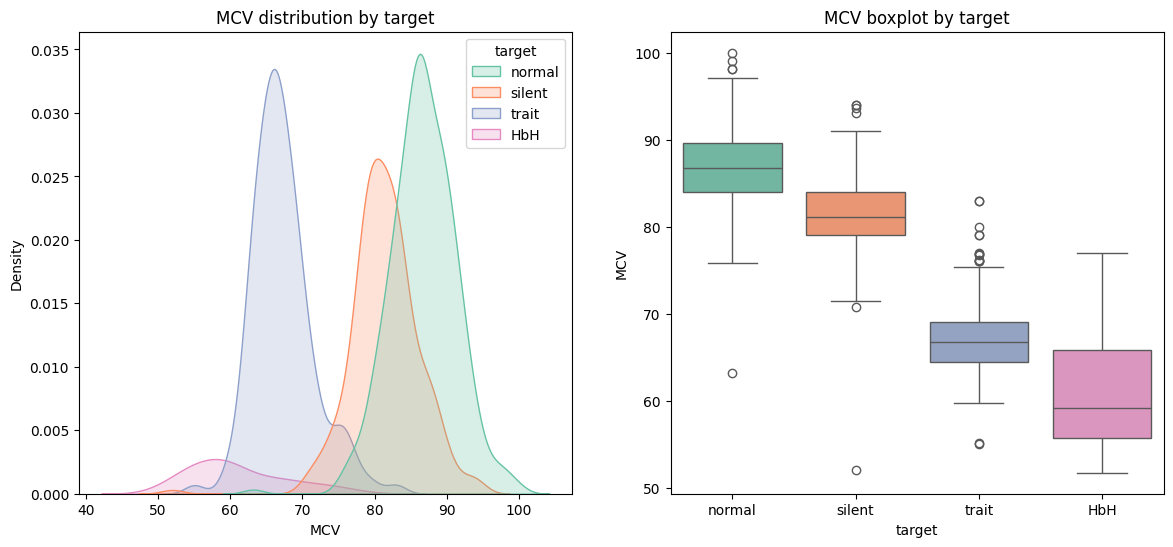

/var/folders/1n/hqfxw2512337xx0r3wv599br0000gn/T/ipykernel_95218/460443173.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


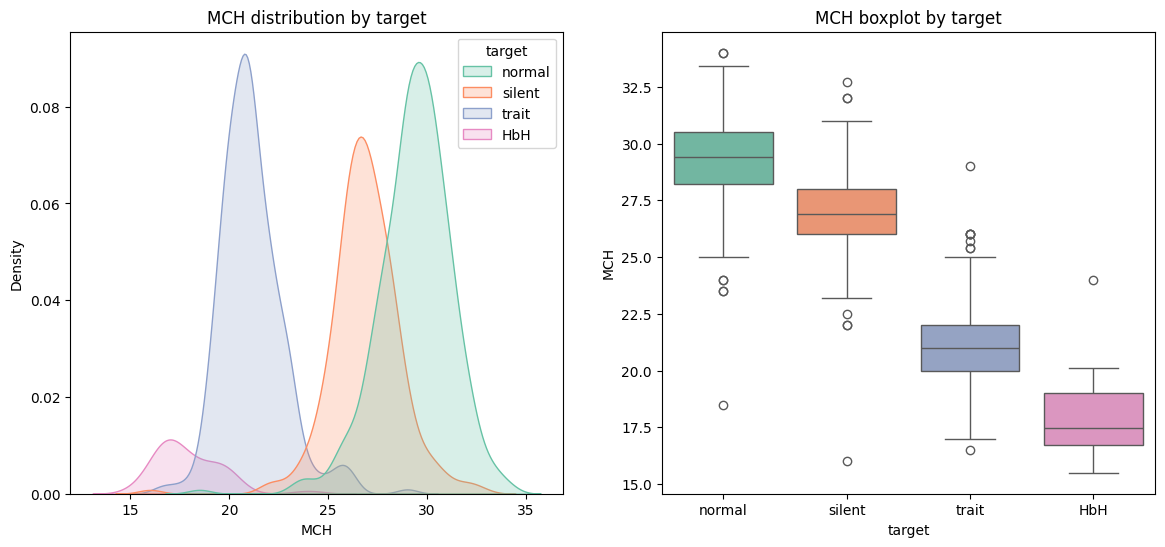

/var/folders/1n/hqfxw2512337xx0r3wv599br0000gn/T/ipykernel_95218/460443173.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


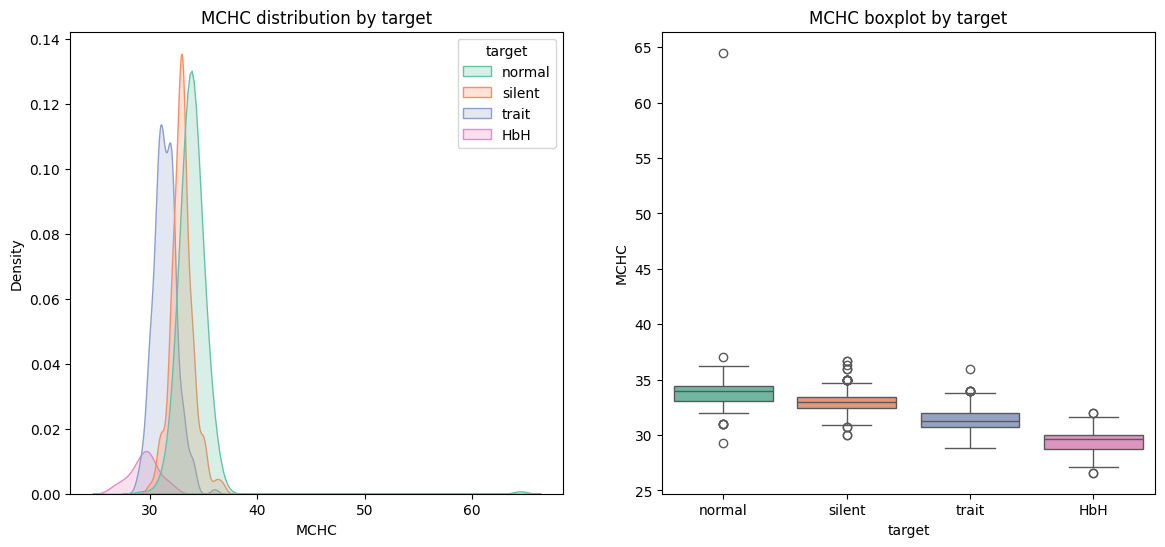

/var/folders/1n/hqfxw2512337xx0r3wv599br0000gn/T/ipykernel_95218/460443173.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


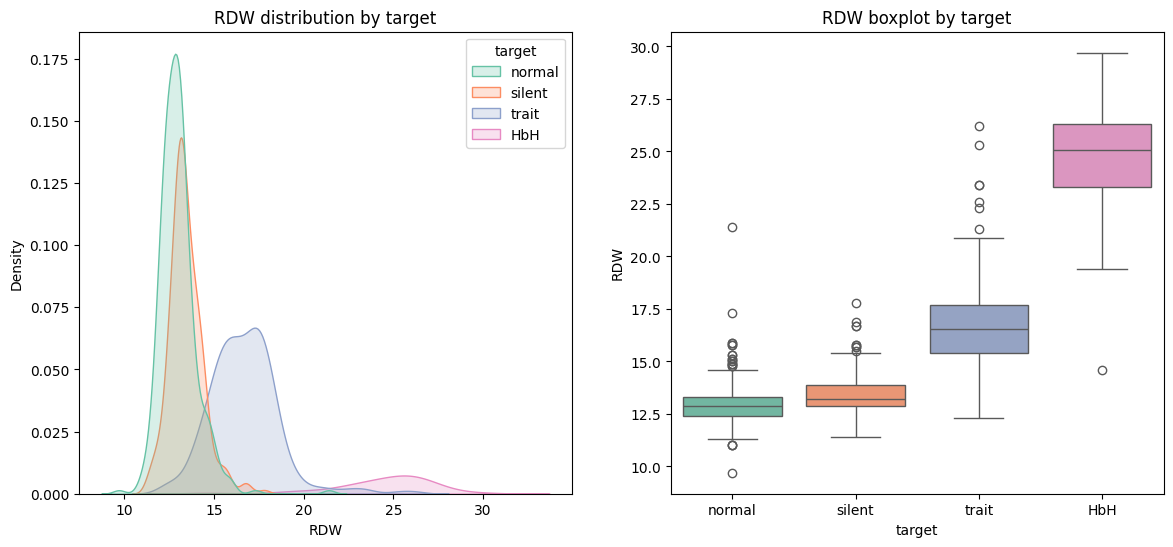

/var/folders/1n/hqfxw2512337xx0r3wv599br0000gn/T/ipykernel_95218/460443173.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


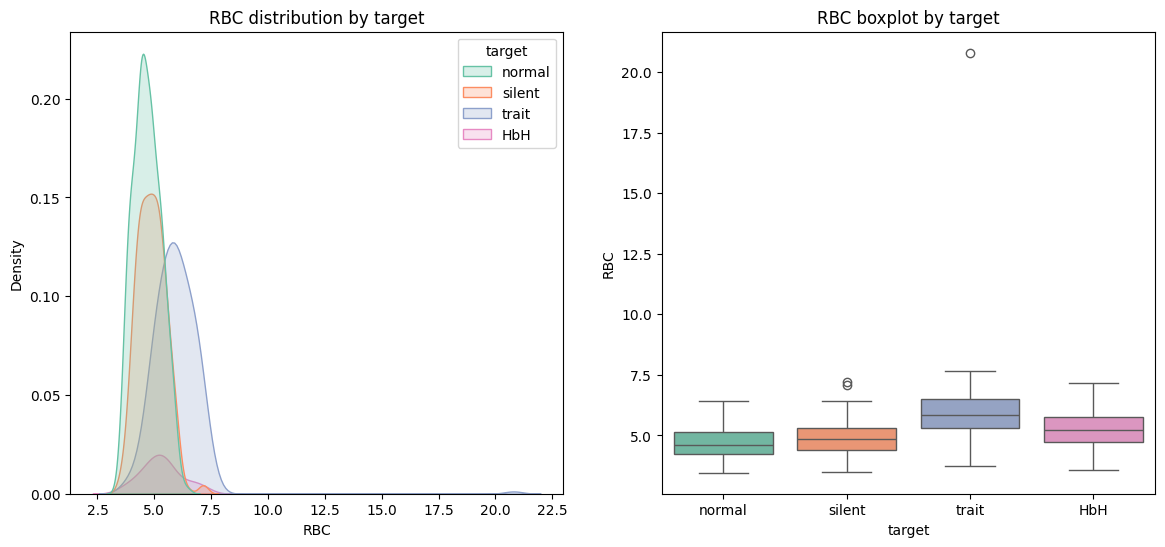

In [33]:
columns_to_plot = [col for col in df.columns if col not in ['target', 'sex']]

for col in columns_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # KDE
    sns.kdeplot(
        data = df,
        x = col,
        hue = 'target',
        ax = axes[0],
        palette = palette,
        fill = True,
        hue_order = class_name,
    )
    axes[0].set_title(f'{col} distribution by target')

    # BOX PLOT
    sns.boxplot(
        data = df,
        x = 'target',
        y = col,
        ax = axes[1],
        palette = palette,
        order = class_name,
    )
    axes[1].set_title(f'{col} boxplot by target')

    # plt.savefig(f'../images/{col}_target_distribution.png')
    # plt.close()
    plt.show()

In [34]:
# TEST KRUSKAL - CBC vs TARGET

var = 'HB'

for group in df['target'].unique():
    stat, p = shapiro(df[df['target'] == group][var])
    skewness = skew(df[df['target'] == group][var])
    print(f'{group}: {p}; Skewness: {skewness}')

f_value, p_value_a = f_oneway(
    df[df['target'] == 'normal'][var],
    df[df['target'] == 'silent'][var],
	df[df['target'] == 'trait'][var],
	df[df['target'] == 'HbH'][var],
)
h_value, p_value_k = kruskal(
    df[df['target'] == 'normal'][var],
	df[df['target'] == 'silent'][var],
	df[df['target'] == 'trait'][var],
	df[df['target'] == 'HbH'][var]
)
print(f'Kruskal-Wallis H-value: {h_value}, p-value: {p_value_k}; Anova F-Value: {f_value}, p-value: {p_value_a}')

silent: 0.0002850222241357614; Skewness: 0.3509646204995375
trait: 0.02149132967630057; Skewness: 0.09519257794578885
HbH: 0.0719187288791992; Skewness: 0.0940608318238485
normal: 0.0006260443860845001; Skewness: 0.1604411720411668
Kruskal-Wallis H-value: 165.9613751294463, p-value: 9.472889029805217e-36; Anova F-Value: 96.74695614124572, p-value: 6.439258107049213e-54


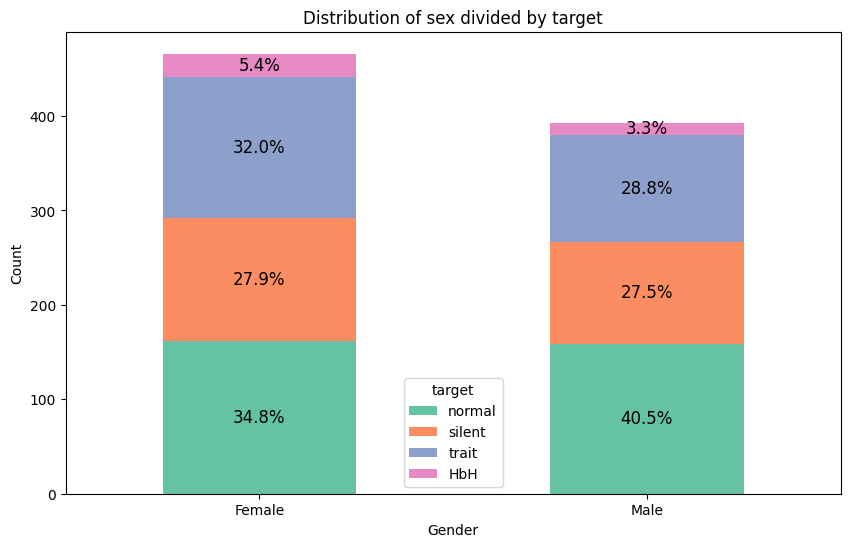

In [35]:
counts = df.groupby(['sex', 'target']).size().unstack(fill_value = 0)
counts = counts[class_name]
counts_percent = counts.div(counts.sum(axis = 1), axis = 0) * 100

ax = counts.plot(kind = 'bar', stacked = True, color = palette, figsize = (10, 6))

for i, sex in enumerate(counts.index):
    cumulative_sum = 0
    for cn in class_name:
        count = counts.loc[sex, cn]
        percentage = counts_percent.loc[sex, cn]
        if count > 0:
            ax.text(i, cumulative_sum + count / 2, f'{percentage:.1f}%', ha = 'center', va = 'center', color = 'black', fontsize = 12)
        cumulative_sum += count

plt.title('Distribution of sex divided by target')
plt.ylabel('Count')
plt.xlabel('Gender')

ax.set_xticklabels(['Female', 'Male'], rotation=0)  # Ruota le etichette di 0 gradi (orizzontale)

plt.show()

In [36]:
# TEST CHI SQUARE - SEX vs TARGET
contingency_table = pd.crosstab(df['sex'], df['target'])
res = chi2_contingency(contingency_table)
print(contingency_table)
print(f'chi2 = {res.statistic}, pvalue = {res.pvalue}')

target  HbH  normal  silent  trait
sex                               
female   25     162     130    149
male     13     159     108    113
chi2 = 4.627383244983674, pvalue = 0.20120555569519416


In [37]:
# REMOVE OUTLIERS FROM MCHC AND RBC
df = df[df['MCHC'] != df['MCHC'].max()]
df = df[df['RBC'] != df['RBC'].max()]

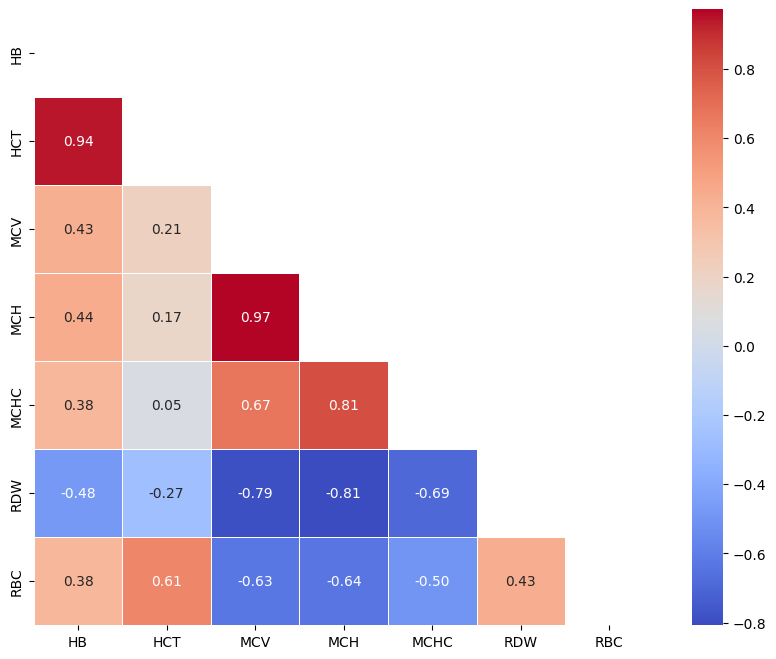

In [38]:
# CORRELATION MATRIX BETWEEN CBC VARIABLES
correlation_matrix = df[['HB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'RBC']].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, mask = mask, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.show()

#plt.title('Correlation Matrix')
#plt.savefig('../images/correlation_matrix.png')